In [25]:
from modular_matrix import *
from transition_helpers import *
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def each_possible_grid(rows, cols, mod):
    # each grid can be thought of as a number in base mod
    for i in range(mod**(rows*cols)):
        grid = np.zeros(rows*cols)
        j = len(grid)-1
        while i > 0:
            grid[j] = i % mod
            i = i // mod
            j -= 1
        yield grid.reshape((rows, cols))

In [3]:
def cycle_information(A, grid):
    try:
        b = grid.ravel()
        seen = [tuple(b.astype(int))]
        while True:
            b = A.solve(b)
            sight = tuple(b.astype(int))
            if sight in seen:
                return len(seen), seen.index(sight)
            else:
                seen.append(sight)
    except SingularMatrixError:
        return 0, 0

In [10]:
adj = lambda i, j: [[i,j,1],[i+1,j,1],[i-1,j,1],[i,j+1,1],[i,j-1,1]]

def results_for_mod(k, n, m):
    A = transition_matrix(adj, n, m, k)
    if A.nullity() > 0:
        return False
    cycles = []
    eigvecs = []
    for grid in each_possible_grid(n, m, k):
        length, index = cycle_information(A, grid)
        cycles.append((length, index))
        if length == 1:
            eigvecs.append(grid)
    return Counter(cycles), eigvecs

In [34]:
def summarize_results_for_mod(k, n, m):
    counts, eigvecs = results_for_mod(k, n, m)
    vals, weights = zip(*[(key[0], val) for key, val in counts.items()])
    plt.hist(vals, weights=weights, bins=range(min(vals),max(vals)+2))
    plt.show()

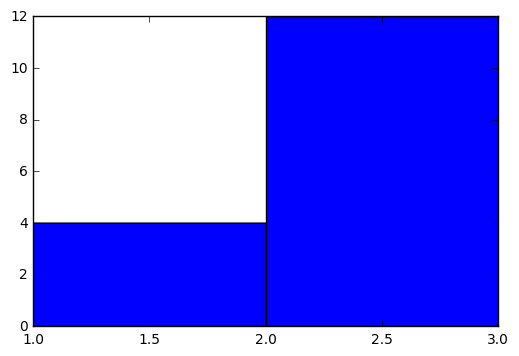

In [35]:
summarize_results_for_mod(2, 2, 2)

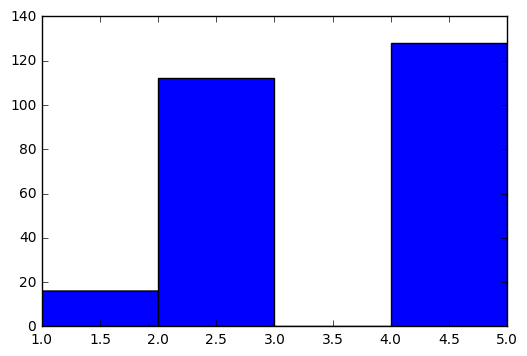

In [37]:
summarize_results_for_mod(4, 2, 2)

In [40]:
results_for_mod(6, 2, 2)

(Counter({(1, 0): 12,
          (2, 0): 36,
          (6, 0): 72,
          (7, 1): 144,
          (8, 0): 96,
          (8, 2): 48,
          (9, 1): 180,
          (9, 3): 108,
          (10, 2): 60,
          (10, 4): 84,
          (11, 3): 72,
          (11, 5): 72,
          (12, 4): 60,
          (12, 6): 60,
          (13, 5): 60,
          (13, 7): 24,
          (14, 6): 60,
          (14, 8): 12,
          (15, 7): 36}),
 [array([[ 1.,  0.],
         [ 0.,  5.]]), array([[ 1.,  1.],
         [ 5.,  5.]]), array([[ 1.,  2.],
         [ 4.,  5.]]), array([[ 1.,  3.],
         [ 3.,  5.]]), array([[ 1.,  4.],
         [ 2.,  5.]]), array([[ 1.,  5.],
         [ 1.,  5.]]), array([[ 2.,  0.],
         [ 0.,  4.]]), array([[ 2.,  1.],
         [ 5.,  4.]]), array([[ 2.,  2.],
         [ 4.,  4.]]), array([[ 2.,  3.],
         [ 3.,  4.]]), array([[ 2.,  4.],
         [ 2.,  4.]]), array([[ 2.,  5.],
         [ 1.,  4.]])])

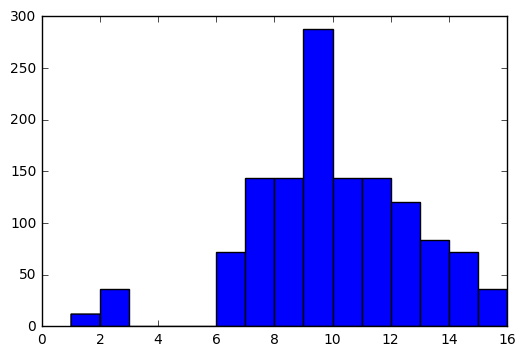

In [39]:
summarize_results_for_mod(6, 2, 2)

In [ ]:
results_for_mod(6, 3, 3)